<a href="https://colab.research.google.com/github/emrf2b/CS4300AI_NN_Project/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy.random import seed #required for reproducibility
seed(19) #required for reproducibility
from tensorflow import set_random_seed #required for reproducibility
set_random_seed(19) #required for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import keras.utils
import numpy as np
import matplotlib.pyplot as plt

In [88]:
from google.colab import files
uploaded = files.upload()

Saving CS4300AIProjectGolfDataset.csv to CS4300AIProjectGolfDataset (11).csv


In [0]:
import numpy as np
xy = np.genfromtxt('CS4300AIProjectGolfDataset.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4), max_rows = 195)

Data imported for this project consists of 195 PGA golfer's statistics The four imported columns include this project's independent variable, the proportion of top-ten placements and the three input features. The original dataset also includes the golfer's names which is irrelevant to this project. There are many other columns that included further statistics over the year of 2017, but those have been omitted in the imported subset of data for the sake of brevity. The original dataset can be observed in this project's Github page.

The input features used for prediction of placing in the top-ten of a major golf tournament are: an Experience Measure, an Accuracy Measure, and Average Distance Drived (of the golf ball). The Experience Measure was created by multiplying Age and Rounds Played (in the year). Essentially, I wanted to balance recent play (Rounds Played) and overall play (Age) experience measures. While it is true that all golfers do not begin playing golf at the same age, and therefore have varying starting ages, nearly all professional golfers have played for a college. Then we can assume that all players have been golfing since at least their teenage years. It is further assumed that older players will have richer backgrounds in the sport and therefore can make sounder mental and gamewise judgements. Rounds Played captures more recent player experiences. For example, course conditions can change from year to year. If someone has been playing his entire life, but has no experience on a particular course, his lifetime of playing my have little to do with placing well at that event. On the other hand, if a new player has kept up with recent changes in conditions and has played the course regularly, he may have a better shot than the more generally experienced player. 

The Accuracy Measure is based on the current season statistics. Particularly, Green-In-2 and proportion of Fairways Hit were multiplied to create this metric. Accuracy is important in all sports, but golf particularly because slight mishaps are often very costly and hard to come back from. Hitting the fairway is one way to judge a golfer's precision. The goal of the first shot is usually to land on a fairway to best set up the next shot which is usually the approach to the green. Shots that end up in the taller grass, sand pits, or hazardous areas are likely to result in higher overall scores, which is not desirable. However, sometimes golfers are good at getting out of these situations, making the first shot of the hole not as vital as it may first appear. This is how the Green-In-2 variable is useful--golfers whom get to the green (the area with the hole) in 2 shots on par 4 and par 5 holes are very likely to make par or improve their scores by making birdies. Putting is obviously a challenge as well, but I would like this examination to remain solely on the initial shots. 

Consequently, this bring us to the final input feature, Average Driving Distance. Drives are measured in yards and theoretically can be made with any club, but are most often made with a driver. Subsequently, the first shot in gold is made from the tee box and is called a drive. The object of the drive is to get the ball as close to the green as possible. A long drive is highly sought-after and prized in the world of golf, hence its appearance in this project. However, the power that a drive generally generates may cause a lack of control in precision, causing shots to veer off target. Also, golfers whom insist on driving the ball as hard and long as possible are not always thinking strategically about hole/course conditions. 

In [92]:
print(xy.shape)

(195, 4)


In [0]:
print(xy[0:, :])

In [94]:
#norm_xy = (keras.utils.normalize(xy, axis=-1, order=2))

## Mins and maxes of the Output Variable, Proportion of Top-Ten Placements
print("Range of Proportion of Top-Ten Tournament Placements:")
print(np.max(xy[:, 3]))
print(np.min(xy[:, 3]))

Range of Proportion of Top-Ten Tournament Placements:
0.611111111
0.0


In [95]:
##Intital mins and maxes of the Experience Measure (age * no_rounds_played) variable
print("Range of Experience Measure:")
print(np.max(xy[:, 2]))
print(np.min(xy[:, 2]))

#print(np.max(norm_xy[:, 2]))
#print(np.min(norm_xy[:, 2]))

Range of Experience Measure:
4554.0
1113.0


In [96]:
##Intital mins and maxes of the Accuracy Measure (hole_in_2 * fairways_hit) variable
print("Range of Accuracy Measure:")
print(np.max(xy[:, 1]))
print(np.min(xy[:, 1]))


#print(np.max(norm_xy[:, 1]))
#print(np.min(norm_xy[:, 1]))

Range of Accuracy Measure:
5317.5682
1826.3136


In [97]:
##Intital mins and maxes of the Average Ball Driving Distance
print("Range of Average Driving Distance:")
print(np.max(xy[:, 0]))
print(np.min(xy[:, 0]))

#print(np.max(norm_xy[:, 0]))
#print(np.min(norm_xy[:, 0]))

Range of Average Driving Distance:
320.2
278.4


The data consist of 195 records, making 155 of those items approximately 80 percent. That number of records makes up the training set, leaving 40 for testing. 

In [0]:
#xy_train = norm_xy[0:155, 0:]
#xy_test  = norm_xy[155:, 0:]

xy_train = xy[0:155, 0:]
xy_test  = xy[155:, 0:]

In [99]:
print(xy_train.shape)
print(xy_test.shape)

(155, 4)
(40, 4)


The input feature Average Distanced Drived (plot observable below) does seem to have a slight linear relationship with the values to be predicted. There are plenty of lower values--speciffically, zeros--of Proportion Top-Ten Placements that pull the line downward. Also, Drive values are concentrated between 285 and 305. Both of these observations are expected given that placing in the top ten of any golf tournament is difficult and that the input feature is an average, hence the middle concentration. Overall, it seems safe to assume there is a slight correlation between driving distance and top-ten placements.

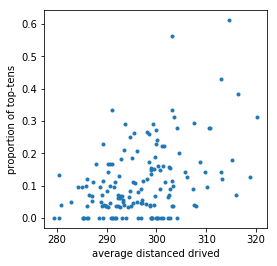

In [100]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 0], xy_train[:, 3], '.')
plt.xlabel('average distanced drived')
plt.ylabel('proportion of top-tens')
plt.show()

Similarly to the previous input feature, the Accuracy Measure provides some semblance of a upward line. There are several outliers, particularly near the top of the graph, that pull the line out of a linear formation and again, the number of zeros strongly affect the outcome variable, but overall there is a relationship. It is intersting to point out that the most accurate player has a median proportion of top-tens, while a moderately accurate player has the highest proportion of top-ten placements. There also is a large cluster at the midpoint of accuracy, near the bottom of top-tens, potentially implying that average accuracy is enough to place in the top ten some of the time. Finally, just before the Accuracy Measure hits 4000, the absence of top-tens is no longer observed. This seems to imply that a greater measure of accuracy is more likely to land a player with a top-ten placement than not.

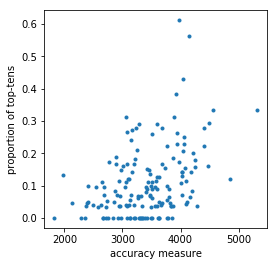

In [101]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 1], xy_train[:, 3], '.')
plt.xlabel('accuracy measure')
plt.ylabel('proportion of top-tens')
plt.show()

The Experience Measure is the least linear and poses several interesting observations. First, some of the highest top-ten earners seem to have less than average experience, while the most experienced players have average or lower proportions of top-tens. This may be attributed to the less advantageous aspects of aging, such as more numerous injuries, not being able to bounce back from illness as swiftly, or greater familial responsibilities or obligations that take top priority over training. 

Second, while a cluster seems to have generated at the bottom-middle of the graph, there also seem to be quite a few players with average to below average experience earning quite a few top-ten placements. Those with greater experience have had less success generally. Maybe this indicates that something younger players are doing, whether with their equipment or training habits, may be attributing to this success. For future research, perhaps this measure would perform better with more robust features.

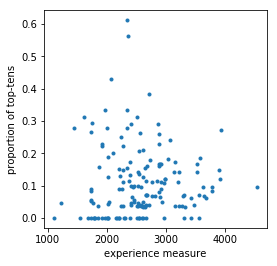

In [102]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 2], xy_train[:, 3], '.')
plt.xlabel('experience measure')
plt.ylabel('proportion of top-tens')
plt.show()

Split both sets into corresponding X (inputs) and Y(outputs)

In [0]:
x_train = xy_train[:, 0:3]
y_train = xy_train[:, 3]
x_test = xy_test[:, 0:3]
y_test = xy_test[:, 3]

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(155, 3)
(40, 3)
(155,)
(40,)


In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

#Prediction Evaluations of Several Types of Models

##Basic Linear Regression Model
This first model will use linear activation since the output feature is a proportion. Given that these proportions lie between 0.0 and .61, I would like to see a model that predicts with an mean absolute error less than five percent (MAE < 0.05).  

After calculations, it seems the model only predicts with 6.8 percent error. This covers approximately a tenth of the range of points, which is troublesome. However, the graphical output of predictions and real values does show a somewhat linear relationship. This is encouraging since the outcome could have been completely uncorrelated. Perhaps the linear neural network will reduce the error and tighten this pattern seen with this basic linear regression.

In [106]:
model = Sequential()
model.add(Dense(1, input_dim = 3, activation='linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [108]:
history = model.fit(x_train, y_train, epochs= 35, verbose = 2, batch_size=10, validation_data = (x_test, y_test))

Train on 155 samples, validate on 40 samples
Epoch 1/35
 - 0s - loss: 1.7983 - mean_absolute_error: 1.0419 - val_loss: 0.9394 - val_mean_absolute_error: 0.7635
Epoch 2/35
 - 0s - loss: 0.6687 - mean_absolute_error: 0.6387 - val_loss: 0.3438 - val_mean_absolute_error: 0.4656
Epoch 3/35
 - 0s - loss: 0.2568 - mean_absolute_error: 0.3936 - val_loss: 0.1265 - val_mean_absolute_error: 0.2841
Epoch 4/35
 - 0s - loss: 0.1009 - mean_absolute_error: 0.2461 - val_loss: 0.0521 - val_mean_absolute_error: 0.1802
Epoch 5/35
 - 0s - loss: 0.0451 - mean_absolute_error: 0.1618 - val_loss: 0.0249 - val_mean_absolute_error: 0.1272
Epoch 6/35
 - 0s - loss: 0.0238 - mean_absolute_error: 0.1165 - val_loss: 0.0151 - val_mean_absolute_error: 0.0974
Epoch 7/35
 - 0s - loss: 0.0155 - mean_absolute_error: 0.0939 - val_loss: 0.0113 - val_mean_absolute_error: 0.0809
Epoch 8/35
 - 0s - loss: 0.0121 - mean_absolute_error: 0.0832 - val_loss: 0.0100 - val_mean_absolute_error: 0.0753
Epoch 9/35
 - 0s - loss: 0.0107 - m

In [0]:
prediction = model.predict(x_test)

In [110]:
print(y_test[0:5])

[0.31818182 0.125      0.06896552 0.17391304 0.11764706]


In [111]:
print(prediction[0:5])

[[0.11110015]
 [0.11285096]
 [0.11864701]
 [0.1716347 ]
 [0.08933426]]


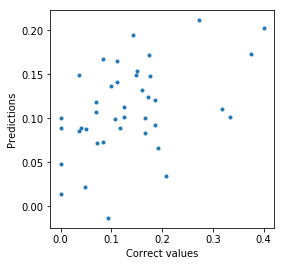

In [112]:
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

In [0]:
results = model.evaluate(x_test, y_test)
print ('mae = ', results[1])

40/40 [==============================] - 0s 155us/step
mae =  0.06597755551338196


## Neural Network - Linear
Unfortunately, it seems this neural network does not significantly improve upon the basic linear regression like I had hoped it would. The differnce in this and the previous model is only 0.0013. This model's 0.0673 error term is still quite large, though I am not well versed in neural network outcomes, so maybe this is acceptable. I am under the impression that an error rate of less than five percent is desirable, but this is in regression analysis. Still, I was hoping for a greater difference, though I am glad to see it at least came close and did actually improve the statistic. 

Now on to building a model using sigmoid activation. It will be interesting to see this outcome since the sigmoid activation is completely wrong for this type of dataset. I will be wildly upset if it even comes close to the predictions of the prior neural networks. Fingers crossed.


In [113]:
model = Sequential()
model.add(Dense(8, input_dim = 3, activation='linear'))
model.add(Dense(4, activation='linear'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))
print(model.summary())
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=35, verbose = 2, batch_size=10, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None
Train on 155 samples, validate on 40 samples
Epoch 1/35
 - 1s - loss: 0.5222 - mean_absolute_error: 0.4011 - val_loss: 0.0137 - val_mean_absolute_error: 0.0834
Epoch 2/35
 - 0s - loss: 0.0115 - mean_absolute_error: 0.0800 - val_loss: 0.0081 - val_mean_absolute_error: 0.066

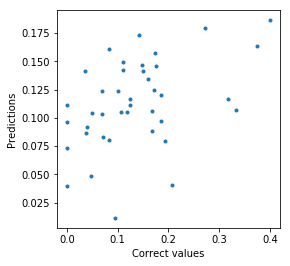

In [114]:
prediction = model.predict(x_test)
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

In [115]:
results = model.evaluate(x_test, y_test)
print ('mae = ', results[1])

40/40 [==============================] - 0s 137us/step
mae =  0.0663707710802555


##Function to Represent Model
After concluding that this neural network does the best job at predicting top-ten placements, it was decided that this model is the best one to build a function that emulates it. The activations were linear and four layers were used, so I need to find the weights of each input feature and multiply those by the ...

In [132]:
#code for function that represents previous NN

#weights by layer
weights_layer1 = model.layers[0].get_weights()[0]
weights_layer2 = model.layers[1].get_weights()[0]
weights_layer3 = model.layers[2].get_weights()[0]
weights_layer4 = model.layers[3].get_weights()[0]

#biases by layer
biases_layer1 = model.layers[0].get_weights()[1]
biases_layer2 = model.layers[1].get_weights()[1]
biases_layer3 = model.layers[2].get_weights()[1]
biases_layer4 = model.layers[3].get_weights()[1]

"""
#print(len(weights_layer1[0]), len(weights_layer2), len(weights_layer3))


print("\nThese are weights:", weights_layer1)
print("\nThese are weights:", weights_layer2)
print("\nThese are weights:", weights_layer3)
print("\nThese are weights:", weights_layer4)

print("\nThese are biases:", biases_layer1)
print("\nThese are biases:", biases_layer2)
print("\nThese are biases:", biases_layer3)
print("\nThese are biases:", biases_layer4)

print("xy:", xy)

#print(len(xy))  # is 195
#print(len(xy[0])) # is 4


print(x_test[0][0])
print(x_test)
"""

my_predictions = []

for k in range(len(x_test)):#for each prediction

  #neuron declaration and initialization
  n1_l1 = 0
  n2_l1 = 0
  n3_l1 = 0
  n4_l1 = 0
  n5_l1 = 0
  n6_l1 = 0
  n7_l1 = 0
  n8_l1 = 0

  n1_l2 = 0
  n2_l2 = 0
  n3_l2 = 0
  n4_l2 = 0

  n1_l3 = 0
  n2_l3 = 0

  n1_l4 = 0

  #INPUT FEATURES TO LAYER ONE
  #multiply the first input feature's kth value by 
  #the weights respective to the next layer of neurons
  counter = 0
  for ix in weights_layer1[0]:
    if counter == 7:
      n8_l1 += x_test[k][0]*ix    
    if counter == 6:
      n7_l1 += x_test[k][0]*ix
      counter += 1
    if counter == 5:
      n6_l1 += x_test[k][0]*ix
      counter += 1
    if counter == 4:
      n5_l1 += x_test[k][0]*ix
      counter += 1
    if counter == 3:
      n4_l1 += x_test[k][0]*ix
      counter += 1
    if counter == 2:
      n3_l1 += x_test[k][0]*ix
      counter += 1
    if counter == 1:
      n2_l1 += x_test[k][0]*ix
      counter += 1     
    if counter == 0:
      n1_l1 += x_test[k][0]*ix
      counter += 1

  #multiply the second input feature's kth value by 
  #the weights respective to the next layer of neurons  
  counter = 0
  for ix in weights_layer1[1]:
    if counter == 7:
      n8_l1 += x_test[k][1]*ix    
    if counter == 6:
      n7_l1 += x_test[k][1]*ix
      counter += 1
    if counter == 5:
      n6_l1 += x_test[k][1]*ix
      counter += 1
    if counter == 4:  
      n5_l1 += x_test[k][1]*ix
      counter += 1
    if counter == 3:
      n4_l1 += x_test[k][1]*ix
      counter += 1
    if counter == 2:
      n3_l1 += x_test[k][1]*ix
      counter += 1
    if counter == 1:
      n2_l1 += x_test[k][1]*ix
      counter += 1     
    if counter == 0:
      n1_l1 += x_test[k][1]*ix
      counter += 1

  #multiply the third input feature's kth value by 
  #the weights respective to the next layer of neurons
  counter = 0
  for ix in weights_layer1[2]:
    if counter == 7:
      n8_l1 += x_test[k][2]*ix    
    if counter == 6:
      n7_l1 += x_test[k][2]*ix
      counter += 1
    if counter == 5:
      n6_l1 += x_test[k][2]*ix
      counter += 1
    if counter == 4:  
      n5_l1 += x_test[k][2]*ix
      counter += 1
    if counter == 3:
      n4_l1 += x_test[k][2]*ix
      counter += 1
    if counter == 2:
      n3_l1 += x_test[k][2]*ix
      counter += 1
    if counter == 1:
      n2_l1 += x_test[k][2]*ix
      counter += 1     
    if counter == 0:
      n1_l1 += x_test[k][2]*ix
      counter += 1

  #add respective biases to each of the neurons
  n1_l1 += biases_layer1[0]
  n2_l1 += biases_layer1[1]
  n3_l1 += biases_layer1[2]
  n4_l1 += biases_layer1[3]
  n5_l1 += biases_layer1[4]
  n6_l1 += biases_layer1[5]
  n7_l1 += biases_layer1[6]
  n8_l1 += biases_layer1[7]

  #make list of the first layer neurons for next part of NN
  l1_neurons = [n1_l1, n2_l1, n3_l1, n4_l1, n5_l1, n6_l1, n7_l1, n8_l1]

  #LAYER TWO
  #multiply the first neuron from layer one by the weights 
  #respective to the next layer of neurons
  counter = 0
  for ix in weights_layer2[0]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1     
        
  #multiply the second neuron from layer one by the weights 
  #respective to the next layer of neurons      
  counter = 0
  for ix in weights_layer2[1]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1 
		  
  #multiply the third neuron from layer one by the weights 
  #respective to the next layer of neurons  
  counter = 0
  for ix in weights_layer2[2]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1    
		  
  #multiply the fourth neuron from layer one by the weights 
  #respective to the next layer of neurons  
  counter = 0
  for ix in weights_layer2[3]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1  
		  
  #multiply the fifth neuron from layer one by the weights 
  #respective to the next layer of neurons      
  counter = 0
  for ix in weights_layer2[4]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1    

  #multiply the sixth neuron from layer one by the weights 
  #respective to the next layer of neurons  
  counter = 0
  for ix in weights_layer2[5]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1    
		  
  #multiply the seventh neuron from layer one by the weights 
  #respective to the next layer of neurons  
  counter = 0
  for ix in weights_layer2[6]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1    
		  
  #multiply the eighth neuron from layer one by the weights 
  #respective to the next layer of neurons  
  counter = 0
  for ix in weights_layer2[7]:
    for j in range(len(l1_neurons)):
      if counter == 3:
        n4_l2 += l1_neurons[j]*ix
      if counter == 2:
        n3_l2 += l1_neurons[j]*ix
        counter += 1
      if counter == 1:
        n2_l2 += l1_neurons[j]*ix
        counter += 1     
      if counter == 0:
        n1_l2 += l1_neurons[j]*ix
        counter += 1    
	  
  #add respective biases to each of the neurons  
  n1_l2 += biases_layer2[0]
  n2_l2 += biases_layer2[1]
  n3_l2 += biases_layer2[2]
  n4_l2 += biases_layer2[3] 

  #make list of neuronic activity so far    
  l2_neurons = [n1_l2, n2_l2, n3_l2, n4_l2]

  #LAYER THREE
  #multiply the first neuron from layer two by the weights 
  #respective to the next layer of neurons 
  counter = 0
  for ix in weights_layer3[0]:
    for j in range(len(l2_neurons)):
      if counter == 1:
        n2_l3 += l2_neurons[j]*ix
      if counter == 0:
        n1_l3 += l2_neurons[j]*ix
        counter += 1

  #multiply the second neuron from layer two by the weights 
  #respective to the next layer of neurons       
  counter = 0
  for ix in weights_layer3[1]:
    for j in range(len(l2_neurons)):
      if counter == 1:
        n2_l3 += l2_neurons[j]*ix
      if counter == 0:
        n1_l3 += l2_neurons[j]*ix
        counter += 1

  #multiply the third neuron from layer two by the weights 
  #respective to the next layer of neurons   
  counter = 0
  for ix in weights_layer3[2]:
    for j in range(len(l2_neurons)):
      if counter == 1:
        n2_l3 += l2_neurons[j]*ix
      if counter == 0:
        n1_l3 += l2_neurons[j]*ix
        counter += 1
		  
  #multiply the fourth neuron from layer two by the weights 
  #respective to the next layer of neurons   
  counter = 0
  for ix in weights_layer3[3]:
    for j in range(len(l2_neurons)):
      if counter == 1:
        n2_l3 += l2_neurons[j]*ix
      if counter == 0:
        n1_l3 += l2_neurons[j]*ix
        counter += 1

  #add respective biases to each of the neurons        
  n1_l3 += biases_layer3[0]
  n2_l3 += biases_layer3[1]

  #layer three list of neurons
  l3_neurons = [n1_l3, n2_l3]

  #create output layer by multiplying the prior 
  #neuron layer by the respective weights 
  for ix in weights_layer4[0]:
    for j in range(len(l3_neurons)):
      n1_l4 += l3_neurons[j]*ix

  for ix in weights_layer4[1]:
    for j in range(len(l3_neurons)):
      n1_l4 += l3_neurons[j]*ix

  #add the final bias to the output layer
  n1_l4 += biases_layer4[0]
  #print("\nThis is the output", k, n1_l4)
  
  my_predictions.append(n1_l4)
  
#the moment we've all been waiting for...
#print("\nResults:", ["{0:0.9f}".format(i) for i in my_predictions])

#print("\nReal Values:")
#for i in range(len(xy)):
#  print(xy[i][3])
  
SAEs = []

#print("\n")
#print(x_test)
#print("\n")
#print(y_test)

for i in range(len(y_test)):
 # print("measured:",my_predictions[i])
  #print("actual:",y_test[i])
  SAEs.append(abs(my_predictions[i] - y_test[i]))
  
print("\n")
print("'SAE' of hand written model =", (sum(SAEs))/(len(y_test)))




'SAE' of hand written model = 0.3262555303964123


##Interpretation of Function Results (directly above)

So, my "sae" is off by approximately 0.26, which is quite a lot given the data. I have tried multiple fixes, including checking and rechecking my loop logic and making sure the right values are showing up in the right places. Perhaps I am missing a step that the Keras neural network performs that I am unaware of. I did my best to emulate the Multilayered Feed-Forward Neural Networks that we studied in Chapter 18. The weights and biases were extracted directly from the model made in the 'Neural Network - Linear' area of this project. Seeing that my results are worse than any of the models done with the Keras software is disheartening, but also somewhat expected since the software has been optimized by far more experienced programmers than I am. I will continue to work on this function and improve upon it if I can by the project presentations.

##Neural Network - Sigmoid
This neural network does an absolutely abismal job of predicting the values, so much so that comparatively, the previous NN looks amazing. It is great to see how changing one thing--albeit a very impactful thing--can make or break the model. The plot below shows no relationship between real values and predictions, unlike the somewhat linear relationship shown directly above. If the input features, particularly the Experience Measure, were more robust, I believe the linear NN would have performed better. 

In [133]:
model = Sequential()
model.add(Dense(8, input_dim = 3, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=35, verbose = 2, batch_size=10, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 3         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None
Train on 155 samples, validate on 40 samples
Epoch 1/35
 - 1s - loss: 0.2887 - mean_absolute_error: 0.5264 - val_loss: 0.2523 - val_mean_absolute_error: 0.4928
Epoch 2/35
 - 0s - loss: 0.2716 - mean_absolute_error: 0.5100 - val_loss: 0.2363 - val_mean_absolute_error: 0.476

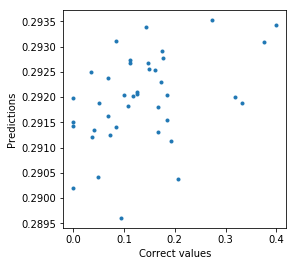

In [134]:
prediction = model.predict(x_test)
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

In [135]:
results = model.evaluate(x_test, y_test)
print ('mae = ', results[1])

40/40 [==============================] - 0s 105us/step
mae =  0.16969274282455443
